# Análisis de la Evasión de Clientes en TelecomX

## Extracción de datos
   

### Importando librerías

In [2]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "colab"


### Leyendo la base de datos

In [3]:

data = pd.read_json("https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json")
data.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Transformación (T - Transform)

### Conoce el conjunto de datos

#### Explorar las columnas del dataset y verificar sus tipos de datos

In [4]:
# Lectura de datos originales
df_original = pd.DataFrame(data)

df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#### Consultar el diccionario para comprender mejor el significado de las variables.

In [5]:
# Diccionario de datos
telecomx_diccionario = {
    "customerID": "número de identificación único de cada cliente",
    "Churn": "si el cliente dejó o no la empresa",
    "gender": "género (masculino y femenino)",
    "SeniorCitizen": "información sobre si un cliente tiene o no una edad igual o mayor a 65 años",
    "Partner": "si el cliente tiene o no una pareja",
    "Dependents": "si el cliente tiene o no dependientes",
    "tenure": "meses de contrato del cliente",
    "PhoneService": "suscripción al servicio telefónico",
    "MultipleLines": "suscripción a más de una línea telefónica",
    "InternetService": "suscripción a un proveedor de internet",
    "OnlineSecurity": "suscripción adicional de seguridad en línea",
    "OnlineBackup": "suscripción adicional de respaldo en línea",
    "DeviceProtection": "suscripción adicional de protección del dispositivo",
    "TechSupport": "suscripción adicional de soporte técnico, menor tiempo de espera",
    "StreamingTV": "suscripción de televisión por cable",
    "StreamingMovies": "suscripción de streaming de películas",
    "Contract": "tipo de contrato",
    "PaperlessBilling": "si el cliente prefiere recibir la factura en línea",
    "PaymentMethod": "forma de pago",
    "Charges.Monthly": "total de todos los servicios del cliente por mes",
    "Charges.Total": "total gastado por el cliente"
}

# Mostramos como tabla
df_diccionario = pd.DataFrame(telecomx_diccionario.items(), columns=["Variable", "Descripción"])
df_diccionario



,Variable,Descripción
0,customerID,número de identificación único de cada cliente
1,Churn,si el cliente dejó o no la empresa
2,gender,género (masculino y femenino)
3,SeniorCitizen,información sobre si un cliente tiene o no una...
4,Partner,si el cliente tiene o no una pareja
5,Dependents,si el cliente tiene o no dependientes
6,tenure,meses de contrato del cliente
7,PhoneService,suscripción al servicio telefónico
8,MultipleLines,suscripción a más de una línea telefónica
9,InternetService,suscripción a un proveedor de internet


#### Identificar las columnas más relevantes para el análisis de evasión.

In [6]:
# Desanidamos las columnas anidadas y creamos el DataFrame para análisis
columnas_anidadas = ['customer', 'phone', 'internet', 'account']
df_desanidadas = [pd.json_normalize(df_original[col]) for col in columnas_anidadas]

df_normalizado = pd.concat([df_original[['customerID', 'Churn']]] + df_desanidadas, axis=1)

# Mostramos las columnas disponibles para análisis
print("Columnas del DataFrame desanidado:\n")
for i, col in enumerate(df_normalizado.columns, start=1):
    print(f"{i:>2}. {col}")

# Vista preliminar de los datos
from IPython.display import display
print("\nPrimeras filas del DataFrame desanidado:")
display(df_normalizado.head(30))


Columnas del DataFrame desanidado:

 1. customerID
 2. Churn
 3. gender
 4. SeniorCitizen
 5. Partner
 6. Dependents
 7. tenure
 8. PhoneService
 9. MultipleLines
10. InternetService
11. OnlineSecurity
12. OnlineBackup
13. DeviceProtection
14. TechSupport
15. StreamingTV
16. StreamingMovies
17. Contract
18. PaperlessBilling
19. PaymentMethod
20. Charges.Monthly
21. Charges.Total

Primeras filas del DataFrame desanidado:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


### Comprobación de incoherencias en los datos

In [7]:
#Valores únicos en cada columna
for col in df_normalizado.columns:
  print(f"valores únicos en la columna'{col}': {df_normalizado[col].nunique()}")
  if df_normalizado[col].nunique() < 50:
    print(df_normalizado[col].unique())
    print('-' * 50)  # Línea divisoria para mejor visualización



valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'tenure': 73
valores únicos en la columna'PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'InternetService': 3
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
valores único

In [8]:
# Verificación de incoherencias

# 1. Tipos de datos
print("\n Tipos de datos por columna:")
print(df_normalizado.info())


 Tipos de datos por columna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract    

In [9]:
# 2. Valores nulos
print("Valores nulos por columna:")
print(df_normalizado.isnull().sum().sort_values(ascending=False))

Valores nulos por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [10]:
# 3. Filas duplicadas
print(f"\nTotal de filas duplicadas: {df_normalizado.duplicated().sum()}")


Total de filas duplicadas: 0


In [11]:
# Verificamos si hay valores vacíos (espacios, strings vacíos, nulos) en columnas categóricas

valores_en_blanco_o_vacio = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nValores en blanco o string vacios por columna:")
print(valores_en_blanco_o_vacio[valores_en_blanco_o_vacio > 0])




Valores en blanco o string vacios por columna:
Churn            224
Charges.Total     11
dtype: int64


In [12]:
# Identificamos columnas categóricas (tipo object)
cat_cols = df_normalizado.select_dtypes(include=['object']).columns.tolist()

# Función para encontrar inconsistencias de mayúsculas/minúsculas en columnas categóricas
def revisar_mayusculas_minusculas(df, columnas):
    resultados = {}
    for col in columnas:
        valores = df[col].dropna().unique()
        # Agrupamos valores que difieran solo en mayúsc/minúsc
        grupos = {}
        for val in valores:
            key = val.lower()
            grupos.setdefault(key, []).append(val)
        # Solo se muestran grupos con más de una variante (posible inconsistencia)
        inconsistencias = {k: v for k,v in grupos.items() if len(v) > 1}
        if inconsistencias:
            resultados[col] = inconsistencias
    return resultados

# Ejecutamos la revisión
inconsistencias = revisar_mayusculas_minusculas(df_normalizado, cat_cols)

if inconsistencias:
    print("Inconsistencias detectadas en mayúsculas/minúsculas:")
    for col, grupos in inconsistencias.items():
        print(f"\nColumna '{col}':")
        for key, variantes in grupos.items():
            print(f"  Variantes para '{key}': {variantes}")
else:
    print("No se detectaron inconsistencias de mayúsculas/minúsculas en columnas categóricas.")



No se detectaron inconsistencias de mayúsculas/minúsculas en columnas categóricas.


### Manejo de inconsistencias

In [13]:
df_normalizado['Churn'] = df_normalizado['Churn'].fillna('Sin datos')

In [14]:
import numpy as np

# Eliminamos las columnas de Churn
df_normalizado = df_normalizado[df_normalizado["Churn"].str.strip() != '']

print("Número de filas después de eliminar las vacías en 'Churn':", len(df_normalizado))

# Reemplazamos "No phone service" y "No internet service"
df_normalizado.replace({'No phone service': 'No', 'No internet service': 'No'}, inplace=True)

# Limpiamos y convertimos 'Charges.Total' a numérico
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].replace(r'^\s*$', np.nan, regex=True)
df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].interpolate(method='linear', limit_direction='both')

# Renombramos columnas
df_normalizado = df_normalizado.rename(columns={
    'customerID': 'ID_cliente',
    'Churn': 'Abandono',
    'gender': 'Genero',
    'SeniorCitizen': 'Cliente_senior',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Duracion_contrato',
    'PhoneService': 'Servicio_telefono',
    'MultipleLines': 'Lineas_multiples',
    'InternetService': 'Servicio_internet',
    'OnlineSecurity': 'Seguridad_online',
    'OnlineBackup': 'Backup_online',
    'DeviceProtection': 'Proteccion_dispositivo',
    'TechSupport': 'Soporte_tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_peliculas',
    'Contract': 'Tipo_contrato',
    'PaperlessBilling': 'Factura_sin_papel',
    'PaymentMethod': 'Metodo_pago',
    'Charges.Monthly': 'Cobro_mensual',
    'Charges.Total': 'Cobro_total'
})

# Diccionario de traducción para los valores en las columnas categóricas
traducciones = {
    'Genero': {
        'Male': 'Masculino',
        'Female': 'Femenino'
    },
    'Servicio_internet': {
    'Fiber optic': 'Fibra óptica',
    'DSL': 'DSL',
    'No': 'No'
    },
    'Tipo_contrato': {
        'Month-to-month': 'Mes a mes',
        'One year': 'Un año',
        'Two year': 'Dos años'
    },
    'Metodo_pago': {
        'Electronic check': 'Cheque electrónico',
        'Mailed check': 'Cheque por correo',
        'Bank transfer (automatic)': 'Transferencia bancaria (automática)',
        'Credit card (automatic)': 'Tarjeta de crédito (automática)'
    },
    'Abandono': {
        'Yes': 'Sí',
        'No': 'No',
        'Sin datos': 'Sin datos'
    }
}

# Aplicamos traducciones
for col, mapping in traducciones.items():
    if col in df_normalizado.columns:
        df_normalizado[col] = df_normalizado[col].map(mapping).fillna(df_normalizado[col])

# Verificaciones
print("\nValores nulos por columna después de la limpieza:")
print(df_normalizado.isnull().sum().sort_values(ascending=False))

print("\nValores únicos en 'Abandono':", df_normalizado['Abandono'].unique())
print("\nTipo de dato en 'Cobro_total':", df_normalizado['Cobro_total'].dtype)

Número de filas después de eliminar las vacías en 'Churn': 7043

Valores nulos por columna después de la limpieza:
ID_cliente                0
Abandono                  0
Genero                    0
Cliente_senior            0
Pareja                    0
Dependientes              0
Duracion_contrato         0
Servicio_telefono         0
Lineas_multiples          0
Servicio_internet         0
Seguridad_online          0
Backup_online             0
Proteccion_dispositivo    0
Soporte_tecnico           0
Streaming_TV              0
Streaming_peliculas       0
Tipo_contrato             0
Factura_sin_papel         0
Metodo_pago               0
Cobro_mensual             0
Cobro_total               0
dtype: int64

Valores únicos en 'Abandono': ['No' 'Sí']

Tipo de dato en 'Cobro_total': float64


### Estandarización y transformación de datos

Acciones a realizar:
Renombrado de columnas: Se traducirán los nombres de las columnas originales del inglés al español, utilizando términos claros y descriptivos. Esto permitirá una mejor interpretación y comunicación, especialmente con audiencias no técnicas.

Conversión de valores categóricos a binarios: Valores textuales binarios como “Yes” y “No” se transformarán a valores numéricos 1 y 0, respectivamente. Esta conversión será fundamental para facilitar el procesamiento matemático y la aplicación de algoritmos analíticos y modelos estadísticos.

Traducción y normalización de categorías: Se traducirán y homogeneizarán valores de categorías específicas, por ejemplo, “Fiber optic” pasará a ser “Fibra óptica” y “No” en servicios se reemplazará por “Sin servicio” o valor 0, evitando ambigüedades y facilitando la interpretación.

Limpieza y manejo de datos faltantes: Se identificarán y tratarán valores vacíos o nulos en columnas numéricas, aplicando interpolación para mantener la integridad y evitar sesgos en los análisis.

Beneficios esperados:
Se obtendrá mayor consistencia y coherencia en la información, facilitando su análisis.

Se logrará mayor claridad en la interpretación, permitiendo comunicar resultados de forma más efectiva a diferentes públicos.

Se preparará el dataset para aplicaciones analíticas avanzadas y modelado predictivo, reduciendo posibles errores por formatos inconsistentes o datos no estructurados.

In [15]:
# Mapeo binario para columnas con "Yes"/"No", sin afectar 'Abandono'
mapa_binario = {'Yes': 1, 'No': 0}

# Excluimos la columna 'Abandono' del reemplazo
columnas_a_transformar = df_normalizado.columns.difference(['Abandono'])

# Aplicamos el reemplazo solo a columnas tipo object (texto)
for col in columnas_a_transformar:
    if df_normalizado[col].dtype == 'object':
        df_normalizado[col] = df_normalizado[col].replace(mapa_binario)

# Verificamos
print("\nTipos de datos tras la conversión binaria:")
print(df_normalizado.dtypes)

print("\nValores únicos en 'Abandono':", df_normalizado['Abandono'].unique())





Tipos de datos tras la conversión binaria:
ID_cliente                 object
Abandono                   object
Genero                     object
Cliente_senior              int64
Pareja                      int64
Dependientes                int64
Duracion_contrato           int64
Servicio_telefono           int64
Lineas_multiples            int64
Servicio_internet          object
Seguridad_online            int64
Backup_online               int64
Proteccion_dispositivo      int64
Soporte_tecnico             int64
Streaming_TV                int64
Streaming_peliculas         int64
Tipo_contrato              object
Factura_sin_papel           int64
Metodo_pago                object
Cobro_mensual             float64
Cobro_total               float64
dtype: object

Valores únicos en 'Abandono': ['No' 'Sí']


/tmp/ipython-input-15-208403310.py:10: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [16]:
print("=== Primeras 10 filas ===")
print(df_normalizado.head(10))

print("\n=== Tipos de datos por columna ===")
print(df_normalizado.dtypes)

print("\n=== Resumen estadístico de columnas numéricas ===")
print(df_normalizado.describe())

print("\n=== Lista de columnas ===")
print(df_normalizado.columns.tolist())


=== Primeras 10 filas ===
   ID_cliente Abandono     Genero  Cliente_senior  Pareja  Dependientes  \
0  0002-ORFBO       No   Femenino               0       1             1   
1  0003-MKNFE       No  Masculino               0       0             0   
2  0004-TLHLJ       Sí  Masculino               0       0             0   
3  0011-IGKFF       Sí  Masculino               1       1             0   
4  0013-EXCHZ       Sí   Femenino               1       1             0   
5  0013-MHZWF       No   Femenino               0       0             1   
6  0013-SMEOE       No   Femenino               1       1             0   
7  0014-BMAQU       No  Masculino               0       1             0   
8  0015-UOCOJ       No   Femenino               1       0             0   
9  0016-QLJIS       No   Femenino               0       1             1   

   Duracion_contrato  Servicio_telefono  Lineas_multiples Servicio_internet  \
0                  9                  1                 0            

### Columna de cuentas diarias

In [17]:
# Creamos la columna 'Cuentas_Diarias' dividiendo la facturación mensual entre 30 días
df_normalizado['Cuentas_Diarias'] = df_normalizado['Cobro_mensual'] / 30

# Verificamos las primeras filas para confirmar
print(df_normalizado[['Cobro_mensual', 'Cuentas_Diarias']])


      Cobro_mensual  Cuentas_Diarias
0             65.60         2.186667
1             59.90         1.996667
2             73.90         2.463333
3             98.00         3.266667
4             83.90         2.796667
...             ...              ...
7262          55.15         1.838333
7263          85.10         2.836667
7264          50.30         1.676667
7265          67.85         2.261667
7266          59.00         1.966667

[7043 rows x 2 columns]


In [18]:
df_normalizado = df_normalizado.drop('Cuentas_Diarias', errors='ignore')

In [19]:
df_normalizado

,ID_cliente,Abandono,Genero,Cliente_senior,Pareja,Dependientes,Duracion_contrato,Servicio_telefono,Lineas_multiples,Servicio_internet,...,Proteccion_dispositivo,Soporte_tecnico,Streaming_TV,Streaming_peliculas,Tipo_contrato,Factura_sin_papel,Metodo_pago,Cobro_mensual,Cobro_total,Cuentas_Diarias
0,0002-ORFBO,No,Femenino,0,1,1,9,1,0,DSL,...,0,1,1,0,Un año,1,Cheque por correo,65.60,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mes a mes,0,Cheque por correo,59.90,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,0,0,4,1,0,Fibra óptica,...,1,0,0,0,Mes a mes,1,Cheque electrónico,73.90,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,1,0,13,1,0,Fibra óptica,...,1,0,1,1,Mes a mes,1,Cheque electrónico,98.00,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,1,0,3,1,0,Fibra óptica,...,0,1,1,0,Mes a mes,1,Cheque por correo,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Femenino,0,0,0,13,1,0,DSL,...,0,1,0,0,Un año,0,Cheque por correo,55.15,742.90,1.838333
7263,9992-RRAMN,Sí,Masculino,0,1,0,22,1,1,Fibra óptica,...,0,0,0,1,Mes a mes,1,Cheque electrónico,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Masculino,0,0,0,2,1,0,DSL,...,0,0,0,0,Mes a mes,1,Cheque por correo,50.30,92.75,1.676667
7265,9993-LHIEB,No,Masculino,0,1,1,67,1,0,DSL,...,1,1,0,1,Dos años,0,Cheque por correo,67.85,4627.65,2.261667


##  Carga y análisis(L - Load & Analysis)

### Análisis descriptivo(Estadistico)

In [20]:

# Estadísticas descriptivas generales de columnas numéricas
print("=== Estadísticas descriptivas generales (numéricas) ===")
print(df_normalizado.describe().round(2))

# Estadísticas para columnas clave
columnas_clave = ['Cobro_mensual', 'Cobro_total', 'Duracion_contrato']
print("\n=== Estadísticas para columnas clave ===")
print(df_normalizado[columnas_clave].describe().round(2))

# Identificamos columnas categóricas
columnas_categoricas = df_normalizado.select_dtypes(include='object').columns.tolist()

# Mostramos número total de clientes únicos (evitamos imprimir todos los IDs)
print(f"\nTotal de clientes únicos: {df_normalizado['ID_cliente'].nunique()}")

# Mostramos conteo de valores para variables categóricas con pocos valores únicos (<=20)
print("\n=== Conteo valores en variables categóricas ===")
for col in columnas_categoricas:
    n_unicos = df_normalizado[col].nunique()
    print(f"\nColumna '{col}' (valores únicos: {n_unicos}):")
    if n_unicos <= 20:
        print(df_normalizado[col].value_counts(dropna=False))
    else:
        print("Demasiados valores únicos para mostrar.")

# Corregimos inconsistencia en 'Servicio_internet' reemplazando 0 por 'No' si existe
if 0 in df_normalizado['Servicio_internet'].unique():
    print("\nReemplazando 0 por 'No' en 'Servicio_internet' para mayor coherencia...")
    df_normalizado['Servicio_internet'] = df_normalizado['Servicio_internet'].replace(0, 'No')
else:
    print("\nNo se encontró 0 en 'Servicio_internet', no se realiza reemplazo.")

# Mostramos conteo de valores en columnas categóricas que contienen el valor 'No'
print("\n=== Conteo de valores para columnas que incluyen 'No' ===")
for col in columnas_categoricas:
    if 'No' in df_normalizado[col].unique():
        print(f"\nColumna '{col}':")
        print(df_normalizado[col].value_counts())



=== Estadísticas descriptivas generales (numéricas) ===
       Cliente_senior   Pareja  Dependientes  Duracion_contrato  \
count         7043.00  7043.00       7043.00            7043.00   
mean             0.16     0.48          0.30              32.37   
std              0.37     0.50          0.46              24.56   
min              0.00     0.00          0.00               0.00   
25%              0.00     0.00          0.00               9.00   
50%              0.00     0.00          0.00              29.00   
75%              0.00     1.00          1.00              55.00   
max              1.00     1.00          1.00              72.00   

       Servicio_telefono  Lineas_multiples  Seguridad_online  Backup_online  \
count             7043.0           7043.00           7043.00        7043.00   
mean                 0.9              0.42              0.29           0.34   
std                  0.3              0.49              0.45           0.48   
min                  0.0

### Distribución de evasión

#### Distribución general del abandono de clientes

In [21]:
px.histogram(df_normalizado,
             x='Abandono',
             text_auto=True,
             color='Abandono',
             title='Distribución de clientes según Abandono',
             color_discrete_map={'Sí': 'red', 'No': 'green'})


#### Gráfico de torta (porcentaje de clientes)

<Axes: title={'center': 'Proporción de Abandono'}>

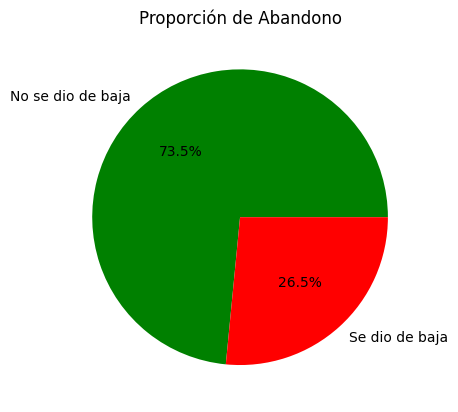

In [22]:
df_normalizado['Abandono'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%',
    colors=['green', 'red'],
    labels=['No se dio de baja', 'Se dio de baja'],
    title='Proporción de Abandono',
    ylabel=''
)


### Recuento de evasión por variables categóricas

#### Género vs Abandono

In [23]:
fig = px.histogram(df_normalizado,
                   x='Genero',
                   color='Abandono',
                   barmode='group',
                   text_auto=True,
                   title='Abandono según Género')

fig.show()


#### Tipo de contrato vs Abandono

In [24]:
fig = px.histogram(df_normalizado,
                   x='Tipo_contrato',
                   color='Abandono',
                   barmode='group',
                   text_auto=True,
                   title='Abandono según Tipo de Contrato')

fig.show()


#### Método de pago vs Abandono

In [25]:
fig = px.histogram(df_normalizado,
                   x='Metodo_pago',
                   color='Abandono',
                   barmode='group',
                   text_auto=True,
                   title='Distribución de Abandono según Método de Pago')

fig.show()



#### Abandono según Servicio de Internet

In [26]:
fig = px.histogram(df_normalizado,
                   x='Servicio_internet',
                   color='Abandono',
                   barmode='group',
                   text_auto=True,
                   title='Abandono según Servicio de Internet')

fig.show()


#### Abandono según Cliente Senior

In [27]:
fig = px.histogram(df_normalizado,
                   x='Cliente_senior',
                   color='Abandono',
                   barmode='group',
                   text_auto=True,
                   title='Abandono según Cliente Senior')

fig.update_xaxes(tickvals=[0,1], ticktext=['No Senior', 'Senior'])

fig.show()


#### Abandono según Duración del Contrato (Tenure)

In [28]:
fig = px.histogram(df_normalizado,
                   x='Duracion_contrato',
                   color='Abandono',
                   barmode='group',
                   nbins=30,
                   title='Abandono según Duración del Contrato')

fig.show()


### Conteo de evasión por variables numéricas

#### Distribución de variables numéricas por abandono

In [29]:
# Listado de variables numéricas a analizar
variables_numericas = ['Cobro_mensual', 'Cobro_total', 'Duracion_contrato']

for var in variables_numericas:
    fig = px.box(df_normalizado,
                 x='Abandono',
                 y=var,
                 color='Abandono',
                 color_discrete_map={'Yes': '#FF4C4C', 'No': '#1F77B4'},
                 title=f'Distribución de {var} según abandono',
                 points='all')  # Muestra los puntos individuales
    fig.show()


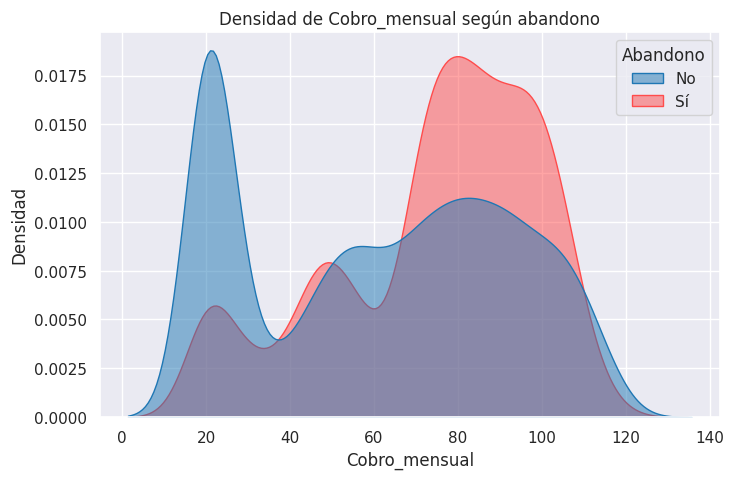

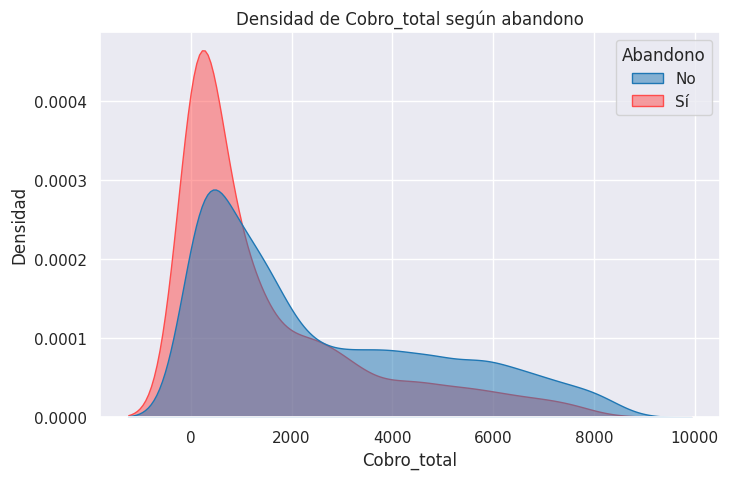

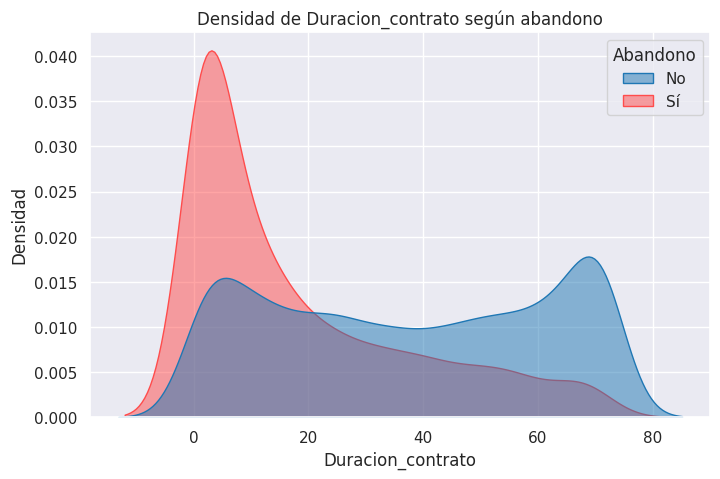

In [30]:
sns.set(style='darkgrid')

for var in variables_numericas:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df_normalizado, x=var, hue='Abandono', fill=True, common_norm=False,
                palette={'Sí': '#FF4C4C', 'No': '#1F77B4'}, alpha=0.5)
    plt.title(f'Densidad de {var} según abandono')
    plt.xlabel(var)
    plt.ylabel('Densidad')
    plt.show()



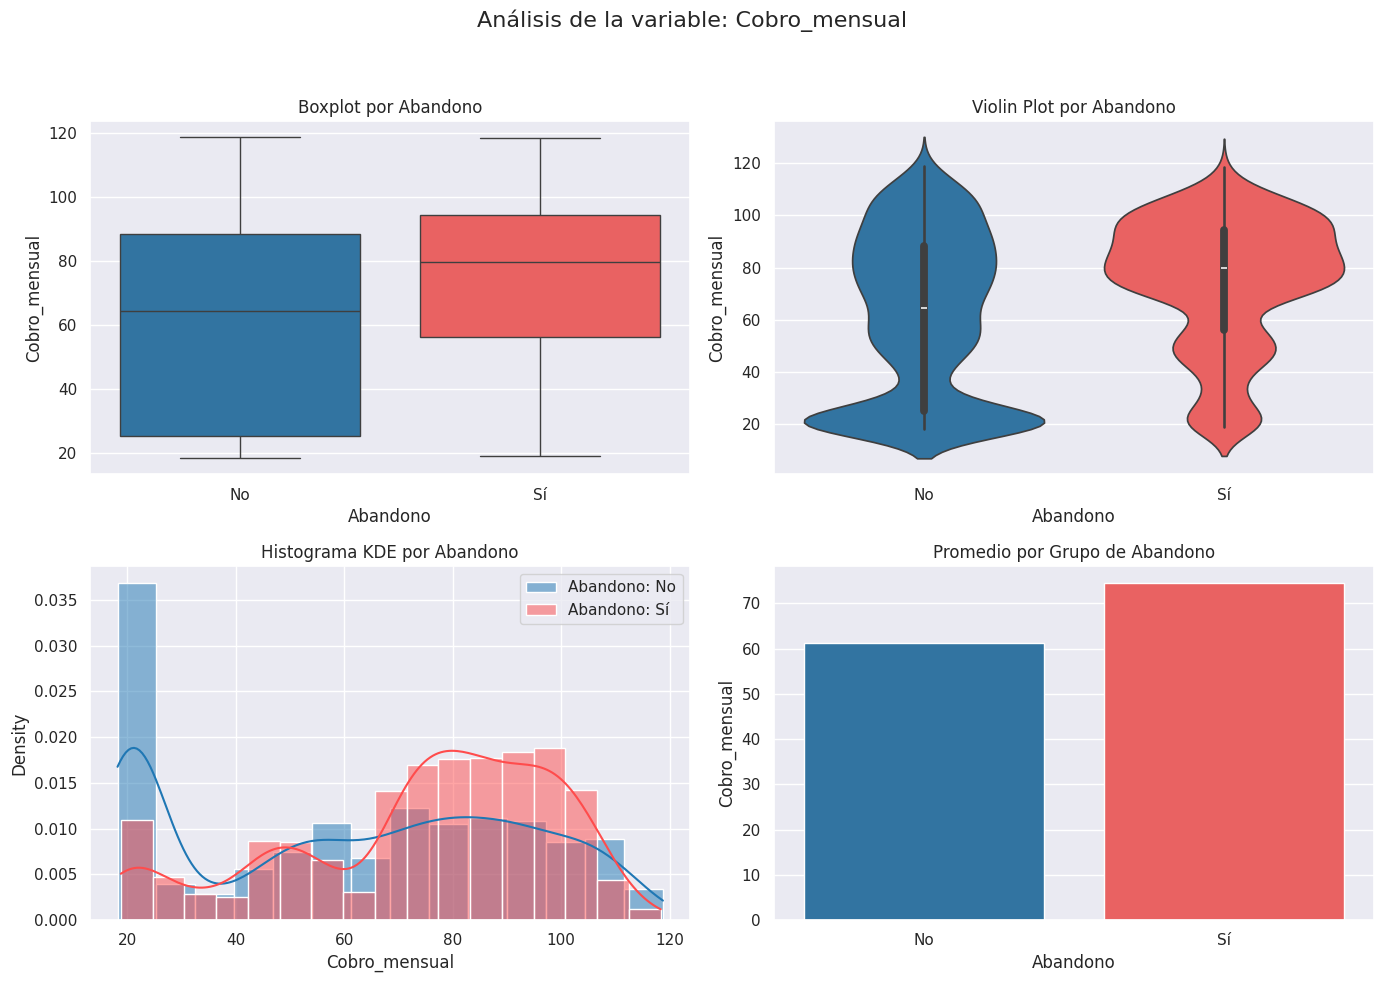

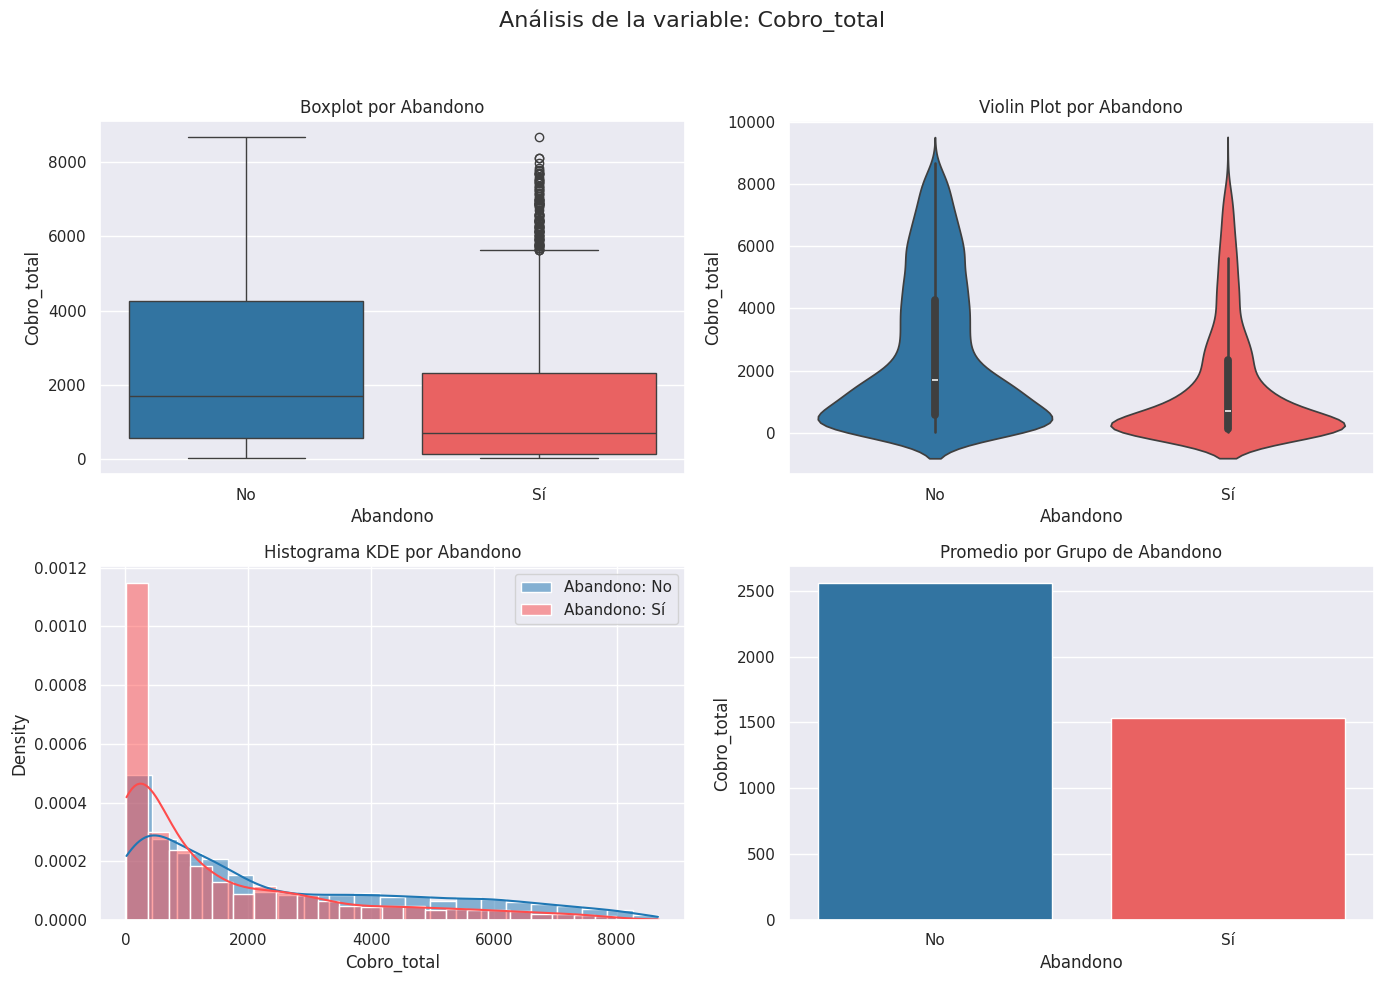

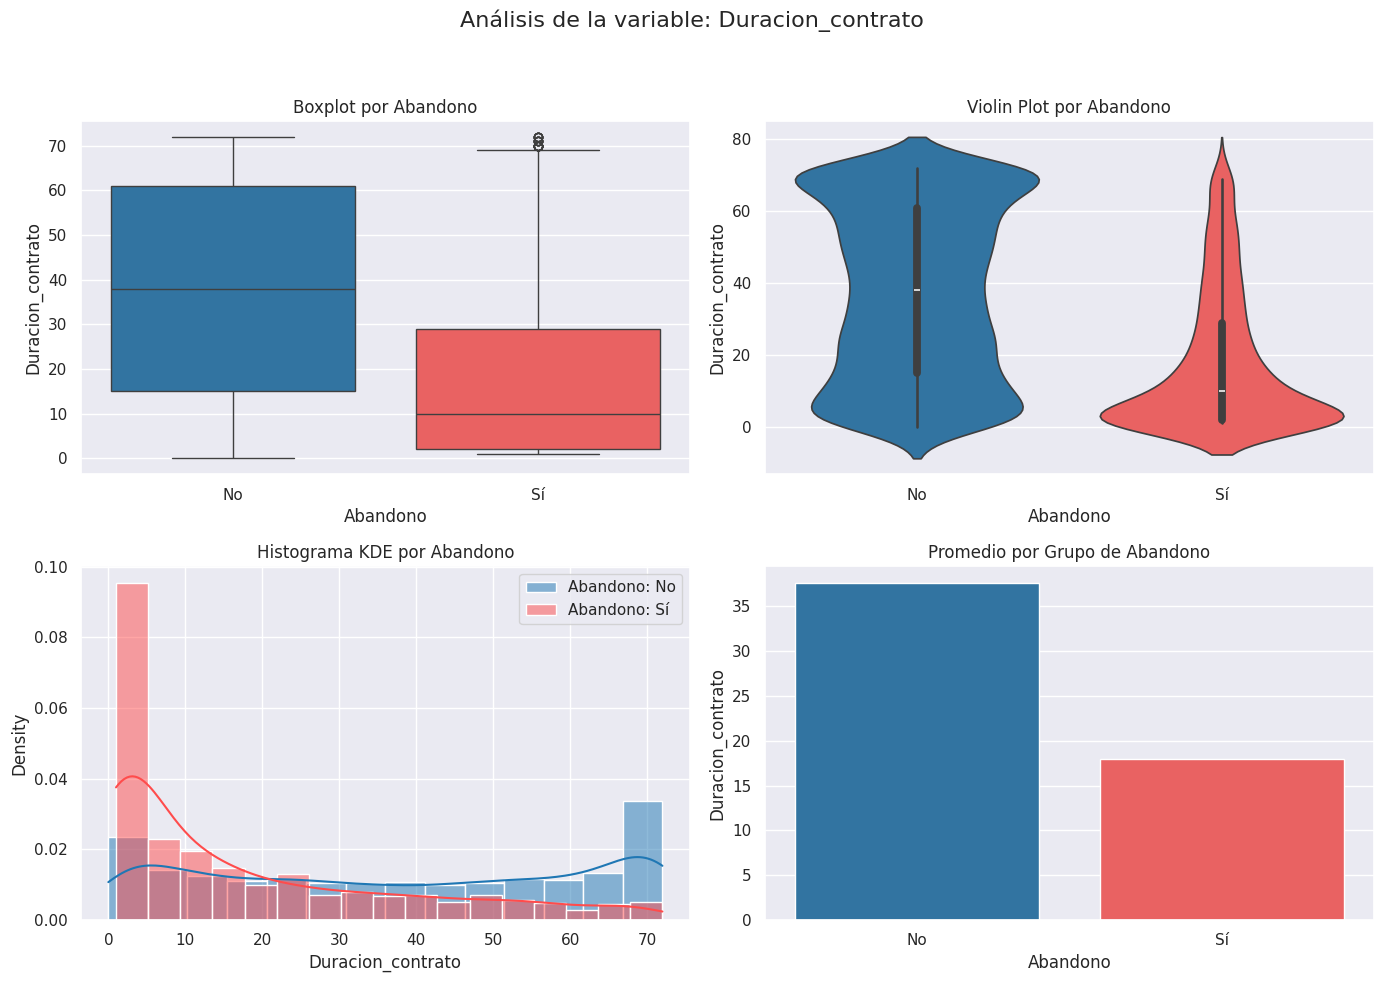

In [31]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

sns.set(style="darkgrid")

# Colores definidos
colores = {'Sí': '#FF4C4C', 'No': '#1F77B4'}

for var in variables_numericas:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Análisis de la variable: {var}', fontsize=16)

    # Boxplot
    sns.boxplot(data=df_normalizado, x='Abandono', y=var, palette=colores, ax=axes[0, 0])
    axes[0, 0].set_title('Boxplot por Abandono')

    # Violin plot
    sns.violinplot(data=df_normalizado, x='Abandono', y=var, palette=colores, ax=axes[0, 1])
    axes[0, 1].set_title('Violin Plot por Abandono')

    # Histogramas superpuestos
    for estado in df_normalizado['Abandono'].unique():
        sns.histplot(df_normalizado[df_normalizado['Abandono'] == estado][var],
                     kde=True, stat='density', label=f'Abandono: {estado}',
                     color=colores[estado], ax=axes[1, 0], alpha=0.5)
    axes[1, 0].set_title('Histograma KDE por Abandono')
    axes[1, 0].legend()

    # Barras de medias
    medias = df_normalizado.groupby('Abandono')[var].mean().reset_index()
    sns.barplot(data=medias, x='Abandono', y=var, palette=colores, ax=axes[1, 1])
    axes[1, 1].set_title('Promedio por Grupo de Abandono')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



In [32]:
# Agrupamos por duración del contrato y calculamos el porcentaje de abandono
df_tasa_abandono = df_normalizado.groupby('Duracion_contrato')['Abandono'].apply(
    lambda x: x.replace({'Sí': 1, 'No': 0}).mean()
).reset_index()

df_tasa_abandono['Abandono'] = df_tasa_abandono['Abandono'] * 100  # convertimos a porcentaje

# Gráfico de línea
fig = px.line(df_tasa_abandono,
              x='Duracion_contrato',
              y='Abandono',
              markers=True,
              title='Tasa de Abandono (%) según Duración del Contrato (Tenure)',
              labels={'Duracion_contrato': 'Meses de contrato', 'Abandono': 'Tasa de Abandono (%)'})
fig.show()



In [33]:
fig = px.scatter(df_normalizado,
                 x='Duracion_contrato',
                 y='Cobro_mensual',
                 color='Abandono',
                 title='Relación entre Duración del Contrato y Cobro Mensual según Abandono',
                 labels={'Duracion_contrato': 'Meses de contrato', 'Cobro_mensual': 'Cobro mensual'})
fig.show()


## ¡Extra! Análisis de correlación entre variables

### Calcular la matriz de correlación entre variables numéricas relevantes

In [34]:
# Seleccionamos las variables numéricas de interés para la correlación
variables_numericas = ['Cobro_mensual', 'Cobro_total', 'Duracion_contrato', 'Cuentas_Diarias']

# Calculamos la matriz de correlación con método de Pearson (por defecto)
correlacion = df_normalizado[variables_numericas].corr()

print("Matriz de correlación entre variables numéricas:")
print(correlacion)


Matriz de correlación entre variables numéricas:
                   Cobro_mensual  Cobro_total  Duracion_contrato  \
Cobro_mensual            1.00000     0.650030           0.247900   
Cobro_total              0.65003     1.000000           0.823814   
Duracion_contrato        0.24790     0.823814           1.000000   
Cuentas_Diarias          1.00000     0.650030           0.247900   

                   Cuentas_Diarias  
Cobro_mensual              1.00000  
Cobro_total                0.65003  
Duracion_contrato          0.24790  
Cuentas_Diarias            1.00000  


### Visualizar la matriz de correlación con un heatmap (mapa de calor)

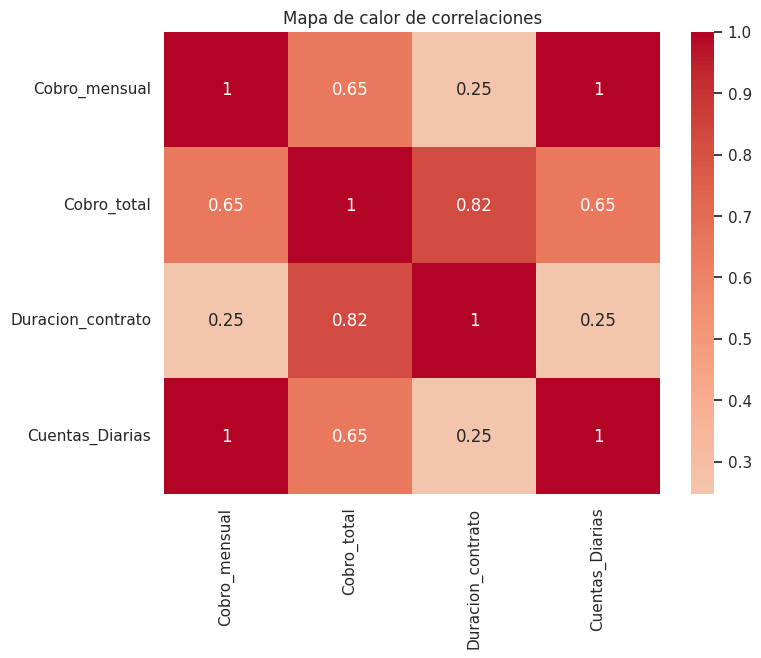

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de calor de correlaciones')
plt.show()


### Crear una variable que indique la cantidad total de servicios contratados

In [36]:
# Sumamos las columnas binarias que indican si el cliente tiene ciertos servicios
servicios = ['Servicio_telefono', 'Servicio_internet', 'Seguridad_online', 'Backup_online',
             'Proteccion_dispositivo', 'Soporte_tecnico', 'Streaming_TV', 'Streaming_peliculas']

# Primero, para 'Servicio_internet' que es categórica, la convertimos a binaria:
df_normalizado['Servicio_internet_bin'] = df_normalizado['Servicio_internet'].apply(lambda x: 0 if x == 'No' else 1)

# Ahora calculamos la cantidad total de servicios
df_normalizado['Cantidad_Servicios'] = (
    df_normalizado['Servicio_telefono'] +
    df_normalizado['Servicio_internet_bin'] +
    df_normalizado['Seguridad_online'] +
    df_normalizado['Backup_online'] +
    df_normalizado['Proteccion_dispositivo'] +
    df_normalizado['Soporte_tecnico'] +
    df_normalizado['Streaming_TV'] +
    df_normalizado['Streaming_peliculas']
)

print(df_normalizado[['Cantidad_Servicios']].head())


   Cantidad_Servicios
0                   5
1                   3
2                   3
3                   6
4                   4


### Correlación entre cantidad de servicios y evasión

In [37]:
# Convertimos 'Abandono' a binario (0=No, 1=Sí) para correlacionar
df_normalizado['Abandono_bin'] = df_normalizado['Abandono'].map({'No': 0, 'Sí': 1})

# Calculamos la correlación
corr_servicios_abandono = df_normalizado[['Cantidad_Servicios', 'Abandono_bin']].corr().iloc[0,1]
print(f"Correlación entre cantidad de servicios y abandono: {corr_servicios_abandono:.3f}")


Correlación entre cantidad de servicios y abandono: -0.031


### Visualizar la relación cantidad de servicios vs evasión con boxplot

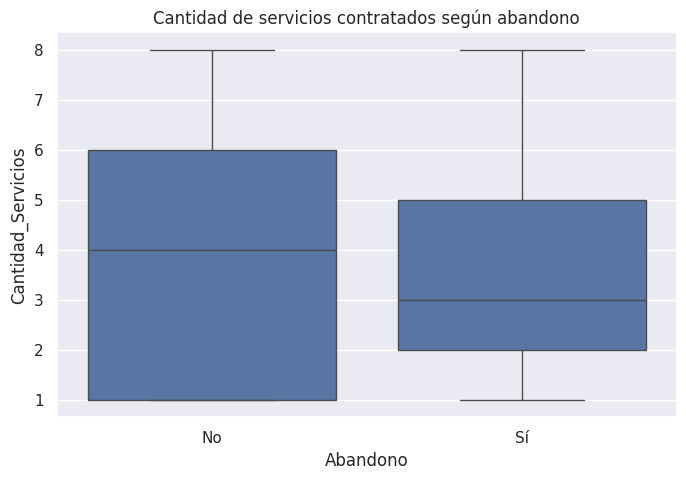

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Abandono', y='Cantidad_Servicios', data=df_normalizado)
plt.title('Cantidad de servicios contratados según abandono')
plt.show()


## Informe Final - Challenge Telecom X Parte 1
1. **Introducción**
El presente análisis tiene como objetivo explorar los factores asociados al abandono de clientes (Churn) en una empresa de telecomunicaciones. El fenómeno de evasión de clientes es una problemática crítica en este sector, ya que implica pérdidas económicas directas, disminución de la cuota de mercado y aumento en los costos de adquisición de nuevos clientes.

Con base en una base de datos proporcionada, se busca comprender qué características están más asociadas al abandono y generar insumos que permitan diseñar estrategias de retención más efectivas.

2. **Limpieza y Tratamiento de Datos**
Se llevó a cabo un proceso riguroso de limpieza y transformación de datos, que incluyó las siguientes etapas:

Importación de archivos CSV desde URLs y carga en un único DataFrame consolidado.

Desanidamiento de columnas anidadas por secciones (customer, phone, internet, account) para obtener un DataFrame plano (df_normalizado).

Estandarización de nombres de columnas, conversión a minúsculas y reemplazo de caracteres para facilitar su manipulación.

Conversión de variables categóricas como “Yes/No” a valores binarios (0/1), sin afectar la variable objetivo abandono.

Chequeo de valores nulos (no se detectaron) y verificación de tipos de datos adecuados para el análisis.

Cambio del nombre de la variable Churn por Abandono para un enfoque más claro en idioma español.

3. **Análisis Exploratorio de Datos**
Se realizaron análisis descriptivos y visualizaciones para detectar patrones relevantes asociados a la evasión. El trabajo se organizó en dos grandes bloques: variables categóricas y numéricas.

Variables Categóricas
Distribución general del abandono: 26,6% de los clientes abandonaron el servicio.

Género vs Abandono: No se observaron diferencias significativas entre hombres y mujeres.

Cliente senior: Leve tendencia a mayor abandono entre clientes mayores.

Tipo de contrato: Contratos mensuales concentran la mayor tasa de evasión.

Método de pago: Mayor abandono en métodos electrónicos manuales. Pago automático reduce el churn.

Servicio de Internet: Clientes sin Internet abandonan menos. Usuarios de fibra óptica presentan mayor churn.

Duración del contrato (tenure): Churn más elevado en los primeros meses de relación contractual.

Visualizaciones incluidas: Gráficos de barras apiladas, tortas, y distribuciones por categoría.

Variables Numéricas
Cobros mensuales: Clientes que abandonan tienden a pagar más por mes.

Cobros totales: Clientes fieles acumulan montos totales más altos.

Duración del contrato: Churn decrece significativamente a medida que crece el tenure.

Visualizaciones incluidas:

Histogramas por clase de abandono.

Boxplots por variable numérica.

Gráfico de línea de tasa de churn vs tenure.

Diagrama de dispersión tenure vs cargo mensual coloreado por evasión.

4. **Conclusiones e Insights**
Los principales hallazgos del análisis son:

La tasa de evasión es alta (más del 25%), y se concentra en los primeros meses del contrato.

El tipo de contrato es un factor decisivo: contratos mensuales implican mayor riesgo.

Clientes con mayor cargo mensual también muestran mayor propensión a abandonar.

Los métodos de pago automáticos se asocian con mayor fidelización.

Los usuarios que contratan más servicios tienden a permanecer más tiempo.

Estos resultados permiten delinear un perfil claro del cliente en riesgo de evasión: nuevo, con contrato mensual, paga mucho por pocos servicios, y no utiliza método de pago automático.

5. **Recomendaciones Estratégicas**
A partir del análisis, se proponen las siguientes acciones para reducir la tasa de abandono:

Campañas de fidelización temprana: Contacto proactivo con nuevos clientes en sus primeros meses.

Incentivos para contratos anuales o de mayor duración, como descuentos o beneficios exclusivos.

Promoción del pago automático, con descuentos o beneficios asociados.

Estrategia de bundles: Promover paquetes con múltiples servicios para aumentar la permanencia.

Segmentación de clientes de alto riesgo y desarrollo de modelos predictivos para actuar preventivamente

## Código para guardar el DataFrame final como CSV

In [39]:
# Guardar el DataFrame limpio y analizado como CSV
df_normalizado.to_csv('datos_tratados.csv', index=False)
